In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5099999999999998, 1.53, 1.55, 1.57, 1.59, 1.6099999999999999, 1.6300000000000001, 1.65, 1.67, 1.69, 1.71, 1.73, 1.75, 1.77, 1.79, 1.81, 1.83, 1.85, 1.87, 1.89, 1.9100000000000001, 1.93, 1.95, 1.97, 1.9900000000000002, 2.0100000000000002, 2.03, 2.05, 2.0700000000000003, 2.09, 2.1100000000000003, 2.13, 2.1500000000000004, 2.17, 2.19, 2.21, 2.23, 2.25, 2.27, 2.29, 2.3099999999999996, 2.33, 2.3499999999999996, 2.37, 2.39, 2.41, 2.43, 2.45, 2.4699999999999998, 2.49, 2.5100000000000002, 2.5300000000000002, 2.55, 2.57, 2.59, 2.61, 2.63, 2.65, 2.67, 2.69, 2.71, 2.73, 2.75, 2.7700000000000005, 2.79, 2.81, 2.83, 2.85, 2.87, 2.89, 2.91, 2.9299999999999997, 2.95, 2.97, 2.99, 3.01, 3.0300000000000002, 3.0500000000000003, 3.07, 3.09, 3.1100000000000003, 3.13, 3.1500000000000004, 3.17, 3.1900000000000004, 3.21, 3.2300000000000004, 3.25, 3.27, 3.29, 3.3099999999999996, 3.3300000000000005, 3.3499999999999996, 3.37, 3.39, 3.41, 3.43, 3.4499999999999997, 3.4699999999999998, 3.49, 3.51, 3.5300000000000002, 3.5500000000000003, 3.5700000000000003, 3.59, 3.61, 3.63, 3.6500000000000004, 3.67, 3.6899999999999995, 3.7100000000000004, 3.7299999999999995, 3.75, 3.77, 3.79, 3.8100000000000005, 3.8299999999999996, 3.8499999999999996, 3.87, 3.8899999999999997, 3.91, 3.93, 3.95, 3.9699999999999998, 3.9899999999999998, 4.01, 4.03, 4.05, 4.07, 4.09, 4.109999999999999, 4.13, 4.15, 4.17, 4.19, 4.21, 4.23, 4.25, 4.2700000000000005, 4.29, 4.31, 4.33, 4.35, 4.37, 4.390000000000001, 4.409999999999999, 4.43, 4.45, 4.47, 4.49, 4.51, 4.53, 4.550000000000001, 4.569999999999999, 4.59, 4.61, 4.63, 4.65, 4.67, 4.6899999999999995, 4.71, 4.7299999999999995, 4.75, 4.7700000000000005, 4.789999999999999, 4.8100000000000005, 4.83, 4.85, 4.87, 4.89, 4.91, 4.930000000000001, 4.95, 4.97, 4.99]

start = X[0] - (X[2] - X[1])/2
stop = X[-1] + (X[2] - X[1])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -2.5; 3 < pT < 4

Y_OS = [1812.0, 1778.0, 1696.0, 1723.0, 1672.0, 1669.0, 1612.0, 1619.0, 1623.0, 1576.0, 1618.0, 1626.0, 1545.0, 1511.0, 1548.0, 1546.0, 1451.0, 1422.0, 1445.0, 1390.0, 1433.0, 1380.0, 1365.0, 1339.0, 1269.0, 1318.0, 1238.0, 1258.0, 1246.0, 1163.0, 1223.0, 1232.0, 1151.0, 1155.0, 1181.0, 1100.0, 1061.0, 1077.0, 1088.0, 1032.0, 1014.0, 1018.0, 987.0, 1015.0, 1005.0, 991.0, 913.0, 936.0, 942.0, 929.0, 913.0, 866.0, 840.0, 863.0, 862.0, 817.0, 836.0, 853.0, 856.0, 844.0, 865.0, 889.0, 888.0, 856.0, 879.0, 918.0, 962.0, 1003.0, 957.0, 1090.0, 1196.0, 1437.0, 1494.0, 1724.0, 2033.0, 2457.0, 2900.0, 3396.0, 3759.0, 3964.0, 3999.0, 3719.0, 3362.0, 2574.0, 1989.0, 1558.0, 1117.0, 921.0, 739.0, 642.0, 536.0, 543.0, 492.0, 521.0, 453.0, 481.0, 466.0, 436.0, 420.0, 397.0, 417.0, 400.0, 388.0, 410.0, 403.0, 378.0, 391.0, 413.0, 389.0, 361.0, 419.0, 370.0, 359.0, 355.0, 325.0, 305.0, 312.0, 260.0, 251.0, 252.0, 262.0, 272.0, 256.0, 227.0, 230.0, 226.0, 235.0, 237.0, 221.0, 222.0, 218.0, 216.0, 199.0, 205.0, 205.0, 206.0, 194.0, 205.0, 214.0, 194.0, 169.0, 175.0, 194.0, 162.0, 171.0, 192.0, 171.0, 182.0, 174.0, 162.0, 124.0, 139.0, 138.0, 151.0, 119.0, 134.0, 149.0, 138.0, 130.0, 140.0, 129.0, 126.0, 126.0, 112.0, 117.0, 109.0, 118.0, 104.0, 122.0, 116.0, 137.0, 114.0, 126.0, 82.0, 105.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [353.0, 389.0, 336.0, 339.0, 330.0, 339.0, 347.0, 367.0, 358.0, 320.0, 308.0, 357.0, 318.0, 330.0, 304.0, 309.0, 312.0, 300.0, 338.0, 311.0, 332.0, 301.0, 320.0, 303.0, 293.0, 304.0, 294.0, 318.0, 267.0, 305.0, 305.0, 273.0, 289.0, 270.0, 283.0, 255.0, 265.0, 301.0, 296.0, 263.0, 295.0, 281.0, 234.0, 224.0, 230.0, 244.0, 248.0, 255.0, 254.0, 252.0, 257.0, 232.0, 268.0, 247.0, 238.0, 254.0, 222.0, 240.0, 244.0, 240.0, 250.0, 260.0, 238.0, 251.0, 242.0, 249.0, 229.0, 261.0, 213.0, 256.0, 255.0, 253.0, 247.0, 261.0, 254.0, 245.0, 249.0, 247.0, 269.0, 240.0, 253.0, 208.0, 243.0, 251.0, 231.0, 205.0, 207.0, 222.0, 185.0, 195.0, 202.0, 196.0, 200.0, 185.0, 200.0, 203.0, 204.0, 181.0, 174.0, 153.0, 159.0, 146.0, 156.0, 166.0, 163.0, 177.0, 164.0, 124.0, 143.0, 123.0, 146.0, 142.0, 148.0, 131.0, 140.0, 116.0, 127.0, 126.0, 120.0, 142.0, 115.0, 113.0, 110.0, 126.0, 109.0, 109.0, 102.0, 118.0, 101.0, 94.0, 108.0, 89.0, 97.0, 102.0, 96.0, 90.0, 97.0, 79.0, 95.0, 95.0, 74.0, 83.0, 80.0, 80.0, 63.0, 74.0, 67.0, 78.0, 74.0, 65.0, 57.0, 53.0, 73.0, 65.0, 85.0, 60.0, 60.0, 59.0, 75.0, 52.0, 55.0, 52.0, 52.0, 69.0, 51.0, 60.0, 51.0, 56.0, 54.0, 42.0, 52.0, 51.0, 51.0, 36.0, 52.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [5.0, 6.0, 11.0, 9.0, 13.0, 7.0, 14.0, 13.0, 12.0, 9.0, 11.0, 14.0, 20.0, 14.0, 18.0, 24.0, 17.0, 15.0, 18.0, 19.0, 20.0, 20.0, 23.0, 19.0, 29.0, 22.0, 28.0, 38.0, 25.0, 38.0, 38.0, 35.0, 42.0, 44.0, 44.0, 48.0, 54.0, 54.0, 65.0, 69.0, 54.0, 71.0, 69.0, 82.0, 79.0, 75.0, 86.0, 107.0, 119.0, 126.0, 119.0, 118.0, 157.0, 138.0, 139.0, 192.0, 200.0, 227.0, 238.0, 255.0, 285.0, 360.0, 419.0, 455.0, 545.0, 588.0, 710.0, 870.0, 1004.0, 1203.0, 1450.0, 1827.0, 2251.0, 2839.0, 3755.0, 4756.0, 6171.0, 7931.0, 9568.0, 10805.0, 11439.0, 10182.0, 8351.0, 6151.0, 4152.0, 2389.0, 1380.0, 754.0, 412.0, 278.0, 173.0, 134.0, 85.0, 63.0, 51.0, 48.0, 30.0, 32.0, 26.0, 27.0, 16.0, 15.0, 14.0, 12.0, 9.0, 11.0, 4.0, 7.0, 7.0, 3.0, 5.0, 2.0, 2.0, 5.0, 3.0, 4.0, 3.0, 2.0, 0.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 0.0, 1.0, 3.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [2.0, 2.0, 2.0, 5.0, 2.0, 4.0, 2.0, 4.0, 2.0, 3.0, 1.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 1.0, 5.0, 6.0, 5.0, 1.0, 2.0, 7.0, 1.0, 5.0, 5.0, 3.0, 10.0, 4.0, 6.0, 4.0, 5.0, 7.0, 11.0, 13.0, 5.0, 7.0, 9.0, 12.0, 5.0, 8.0, 10.0, 9.0, 13.0, 14.0, 16.0, 19.0, 18.0, 17.0, 9.0, 17.0, 21.0, 23.0, 15.0, 17.0, 16.0, 28.0, 29.0, 18.0, 30.0, 22.0, 24.0, 32.0, 23.0, 29.0, 36.0, 35.0, 33.0, 31.0, 50.0, 45.0, 37.0, 46.0, 50.0, 57.0, 62.0, 58.0, 84.0, 75.0, 77.0, 95.0, 89.0, 115.0, 119.0, 128.0, 133.0, 171.0, 178.0, 185.0, 226.0, 260.0, 294.0, 327.0, 347.0, 436.0, 514.0, 603.0, 713.0, 841.0, 1054.0, 1302.0, 1703.0, 2271.0, 2778.0, 3450.0, 4355.0, 4900.0, 5380.0, 5435.0, 4780.0, 3992.0, 2790.0, 1845.0, 1028.0, 603.0, 352.0, 205.0, 140.0, 82.0, 45.0, 43.0, 37.0, 23.0, 28.0, 16.0, 11.0, 18.0, 11.0, 9.0, 5.0, 10.0, 7.0, 3.0, 5.0, 3.0, 1.0, 4.0, 4.0, 4.0, 4.0, 1.0, 0.0, 1.0, 1.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 4.0, 1.0, 1.0, 0.0, 1.0, 2.0, 2.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [7.0, 8.0, 13.0, 14.0, 15.0, 11.0, 16.0, 17.0, 14.0, 12.0, 12.0, 17.0, 24.0, 18.0, 22.0, 27.0, 21.0, 18.0, 19.0, 24.0, 26.0, 25.0, 24.0, 21.0, 36.0, 23.0, 33.0, 43.0, 28.0, 48.0, 42.0, 41.0, 46.0, 49.0, 51.0, 59.0, 67.0, 59.0, 72.0, 78.0, 66.0, 76.0, 77.0, 92.0, 88.0, 88.0, 100.0, 123.0, 138.0, 144.0, 136.0, 127.0, 174.0, 159.0, 162.0, 207.0, 217.0, 243.0, 266.0, 284.0, 303.0, 390.0, 441.0, 479.0, 577.0, 611.0, 739.0, 906.0, 1039.0, 1236.0, 1481.0, 1877.0, 2296.0, 2876.0, 3801.0, 4806.0, 6228.0, 7993.0, 9626.0, 10889.0, 11514.0, 10259.0, 8446.0, 6240.0, 4267.0, 2508.0, 1508.0, 887.0, 583.0, 456.0, 358.0, 360.0, 345.0, 357.0, 378.0, 395.0, 466.0, 546.0, 629.0, 740.0, 857.0, 1069.0, 1316.0, 1715.0, 2280.0, 2789.0, 3454.0, 4362.0, 4907.0, 5383.0, 5440.0, 4782.0, 3994.0, 2795.0, 1848.0, 1032.0, 606.0, 354.0, 205.0, 142.0, 84.0, 47.0, 47.0, 39.0, 25.0, 30.0, 18.0, 11.0, 19.0, 14.0, 11.0, 5.0, 10.0, 9.0, 3.0, 5.0, 5.0, 1.0, 5.0, 4.0, 5.0, 5.0, 1.0, 0.0, 2.0, 1.0, 5.0, 2.0, 3.0, 1.0, 1.0, 2.0, 1.0, 0.0, 1.0, 1.0, 4.0, 1.0, 2.0, 0.0, 1.0, 3.0, 3.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = bins, start = start, stop = stop, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(175, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 163775.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

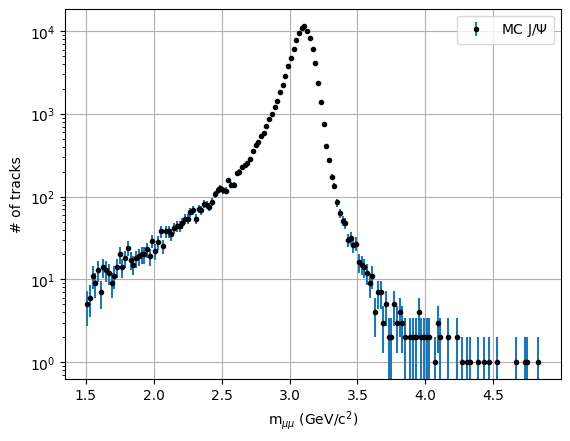

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [11208.26397524565, 3.1006129879434012, 0.06328630602917008, 0.9895561819330133, 3.119764253023745, 2.175642913664813, 2.8410432841405693]
pcov: 
 [[ 3.84859846e+03  6.44317326e-03 -1.49666738e-02 -8.82381513e-02
  -3.00925074e-02 -4.57475160e-01  1.13430807e+00]
 [ 6.44317326e-03  1.72659725e-07 -9.44908779e-08 -3.25276708e-06
   9.77056555e-06 -1.41789390e-06  1.13895096e-06]
 [-1.49666738e-02 -9.44908779e-08  1.49103330e-07  3.00004521e-06
  -6.67149622e-06  5.84000337e-06 -1.34353779e-05]
 [-8.82381513e-02 -3.25276708e-06  3.00004521e-06  1.64696607e-04
  -6.67218028e-04  1.04973665e-04 -2.14140768e-04]
 [-3.00925074e-02  9.77056555e-06 -6.67149622e-06 -6.67218028e-04
   3.87792439e-03 -1.95350627e-04  3.39103105e-04]
 [-4.57475160e-01 -1.41789390e-06  5.84000337e-06  1.04973665e-04
  -1.95350627e-04  1.43595886e-03 -5.35029707e-03]
 [ 1.13430807e+00  1.13895096e-06 -1.34353779e-05 -2.14140768e-04
   3.39103105e-04 -5.35029707e-03  2.69673351e-02]]
residual: 
 {'nfev': 7, '

fit error : 62.03733478796646


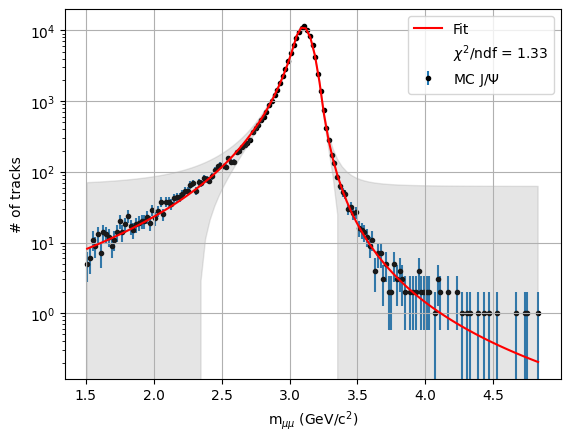

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_13433/2642993752.py:1: RuntimeWarning: divide by zero encountered in divide
  err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))


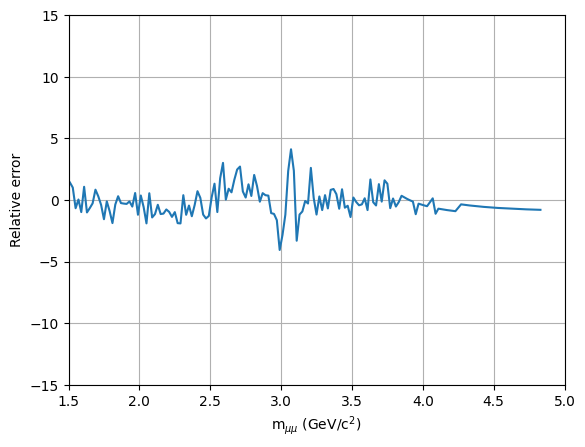

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

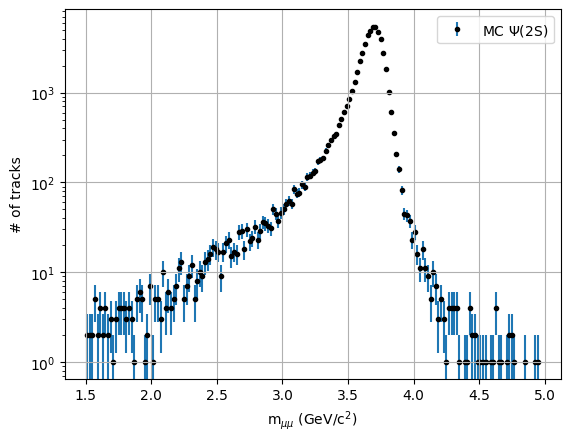

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [5513.742660092439, 3.6931898008881414, 0.06551424772192793, 0.9432125705952001, 3.1701496093175034, 2.1918813154512127, 2.8743864396151664]
pcov: 
 [[ 1.78906896e+03  6.60889357e-03 -1.45543721e-02 -7.01504844e-02
  -7.56422262e-02 -4.33280446e-01  1.12464262e+00]
 [ 6.60889357e-03  3.66485965e-07 -2.01917154e-07 -5.88434395e-06
   1.62806065e-05 -3.07391316e-06  2.90396568e-06]
 [-1.45543721e-02 -2.01917154e-07  3.06546993e-07  5.36180719e-06
  -1.05760697e-05  1.17037077e-05 -2.82058489e-05]
 [-7.01504844e-02 -5.88434395e-06  5.36180719e-06  2.51813365e-04
  -9.71515964e-04  1.84445176e-04 -3.95778069e-04]
 [-7.56422262e-02  1.62806065e-05 -1.05760697e-05 -9.71515964e-04
   5.70327235e-03 -2.97468418e-04  5.27259332e-04]
 [-4.33280446e-01 -3.07391316e-06  1.17037077e-05  1.84445176e-04
  -2.97468418e-04  3.04132504e-03 -1.20747252e-02]
 [ 1.12464262e+00  2.90396568e-06 -2.82058489e-05 -3.95778069e-04
   5.27259332e-04 -1.20747252e-02  6.40466721e-02]]
residual: 
 {'nfev': 7,

fit error : 42.29825054063829


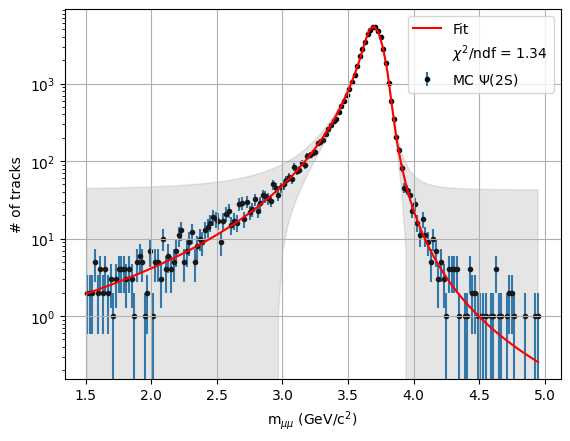

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_13433/3080860769.py:1: RuntimeWarning: divide by zero encountered in divide
  err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))


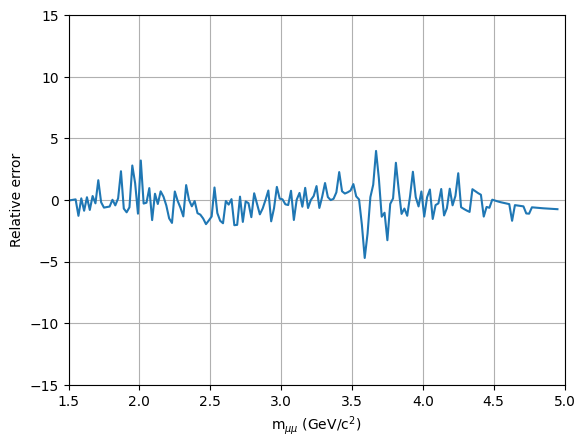

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

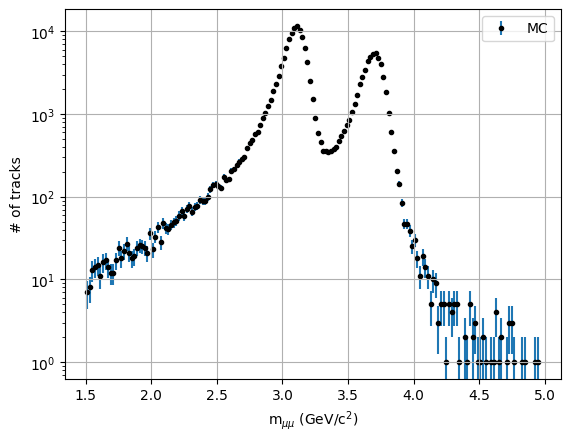

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [11204.795989776929, 3.1005041850086834, 0.06337866103396093, 5515.477424506963, 3.6931911852161274, 0.06547989099954092]
pcov: 
 [[ 4.72006046e+03  4.97028137e-03 -1.45952591e-02 -1.94199424e+01
  -5.23797044e-04  6.85945435e-04]
 [ 4.97028137e-03  1.29312138e-07 -2.77810805e-08  3.56159802e-05
   1.88032656e-09 -1.78597463e-09]
 [-1.45952591e-02 -2.77810805e-08  8.70534903e-08  4.06937987e-04
   8.73914066e-09 -1.24519769e-08]
 [-1.94199424e+01  3.56159802e-05  4.06937987e-04  2.21449125e+03
   6.08421751e-03 -1.46871701e-02]
 [-5.23797044e-04  1.88032656e-09  8.73914066e-09  6.08421751e-03
   2.82227336e-07 -8.35892987e-08]
 [ 6.85945435e-04 -1.78597463e-09 -1.24519769e-08 -1.46871701e-02
  -8.35892987e-08  1.91832881e-07]]
residual: 
 {'nfev': 4, 'fvec': array([ 1.19763847e+00,  8.93195740e-01, -5.82154447e-01, -7.23289881e-01,
       -8.50638192e-01,  3.42993040e-01, -8.52193213e-01, -9.53697883e-01,
       -1.15248714e-01,  6.04988763e-01,  7.65106865e-01, -4.28165931e-01

fit error : 83.27395575561425


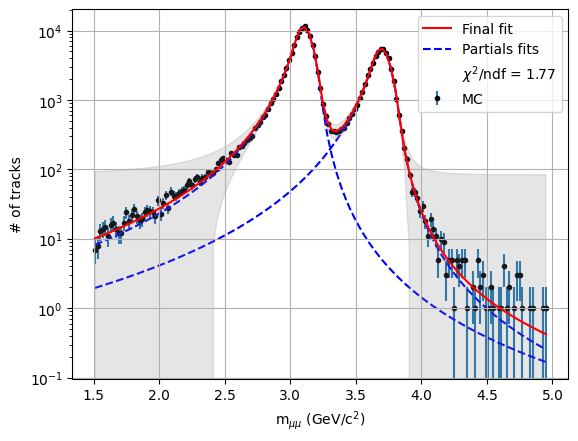

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_13433/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


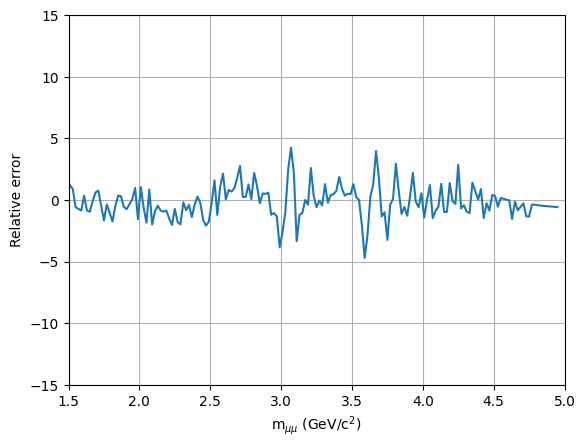

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

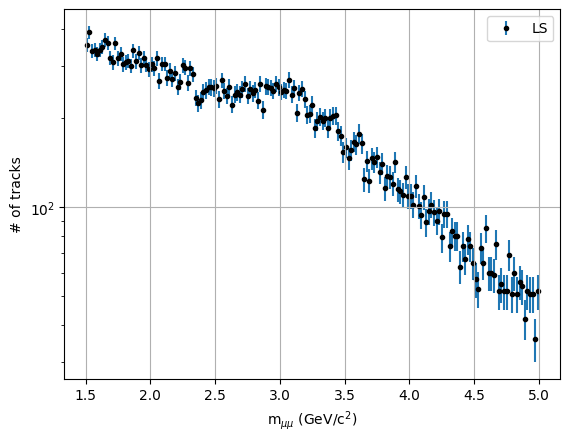

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [5.921973844597266, 5.5613824652708095, 5.208165490240478, 4.903584889878058, 3.8889787004840644]
pcov: 
 [[ 4.58393398e-04 -7.90177663e-05  6.85139927e-05  2.34568595e-05
   1.44921623e-04]
 [-7.90177663e-05  9.31672879e-05  5.33227554e-06 -1.02341189e-05
   5.59425427e-06]
 [ 6.85139927e-05  5.33227554e-06  1.40713669e-04  1.02462464e-04
   2.80137765e-05]
 [ 2.34568595e-05 -1.02341189e-05  1.02462464e-04  1.66444575e-04
  -2.34904199e-04]
 [ 1.44921623e-04  5.59425427e-06  2.80137765e-05 -2.34904199e-04
   2.84828333e-03]]
residual: 
 {'nfev': 16, 'fvec': array([ 0.9322942 , -1.19529725,  1.33951288,  0.91744735,  1.17970667,
        0.44318456, -0.21088118, -1.45335714, -1.19392135,  0.66081664,
        1.16147816, -1.68877243,  0.22081688, -0.61014961,  0.68943439,
        0.24154005, -0.08004161,  0.46397879, -1.76279839, -0.43967013,
       -1.7015301 , -0.12462759, -1.29885166, -0.47249162, -0.00796845,
       -0.7441008 , -0.27648541, -1.7070336 ,  1.15803734, -1.18267

fit error : 0.0608851563193193


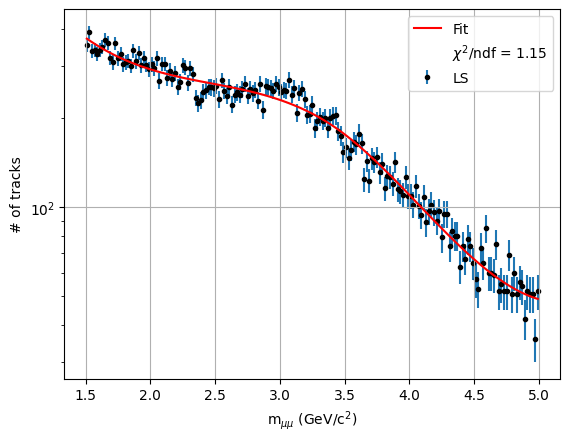

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

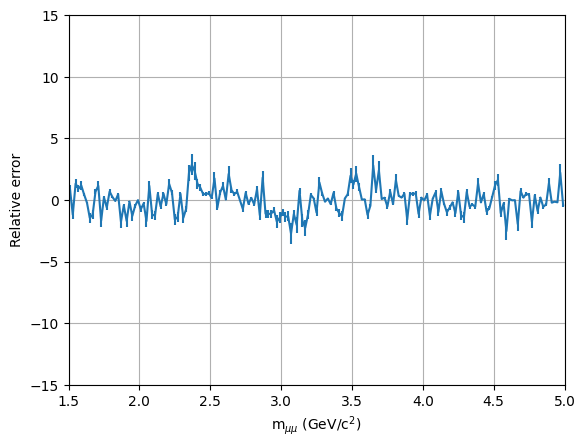

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

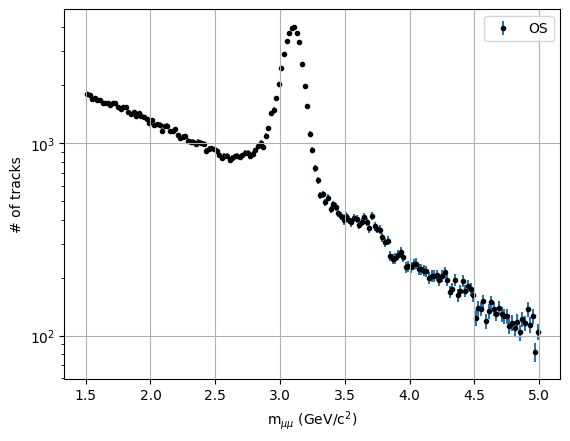

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [3605.6797510519764, 3.0981554172478383, 0.06961493663205963, 71.85063607197854, 3.6884560302328087, 0.07206567248588107, 7.511039945782621, 6.7761537490926385, 5.997572689036848, 5.678677298685373, 4.622285987293585]
pcov: 
 [[ 1.37959331e+03  4.38748775e-03 -1.62082327e-02  6.88660389e+00
  -1.25337084e-02  2.41226445e-02 -1.43322799e-02 -4.23877694e-03
  -3.99401199e-02 -2.50063877e-02 -2.10608471e-02]
 [ 4.38748775e-03  5.40516351e-07 -1.86590657e-07 -2.04521468e-04
   4.72634774e-07 -8.67732639e-07  3.02637170e-08  9.86088437e-07
   1.66755291e-06  8.24095073e-07  1.27443310e-06]
 [-1.62082327e-02 -1.86590657e-07  6.40907074e-07  1.23237182e-03
  -1.27959619e-06  2.65453822e-06 -1.17599185e-06 -2.61885833e-06
  -6.75544488e-06 -4.06449508e-06 -3.37791139e-06]
 [ 6.88660389e+00 -2.04521468e-04  1.23237182e-03  1.58313867e+02
   1.34243442e-02 -8.68942928e-02 -1.30289299e-02 -9.97224495e-03
  -5.42766386e-02 -4.83006253e-02  2.00423948e-02]
 [-1.25337084e-02  4.72634774e-07 

fit error : 39.21619870544144


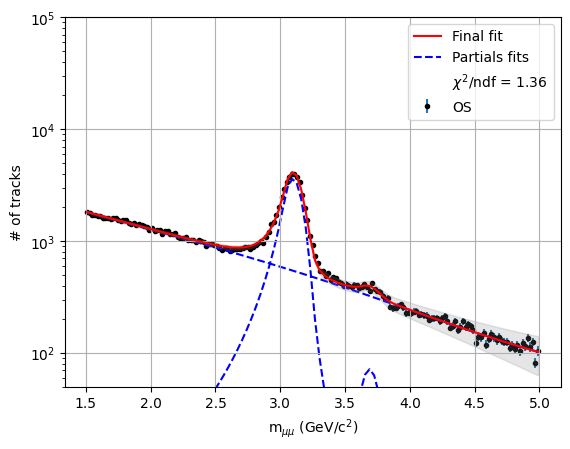

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

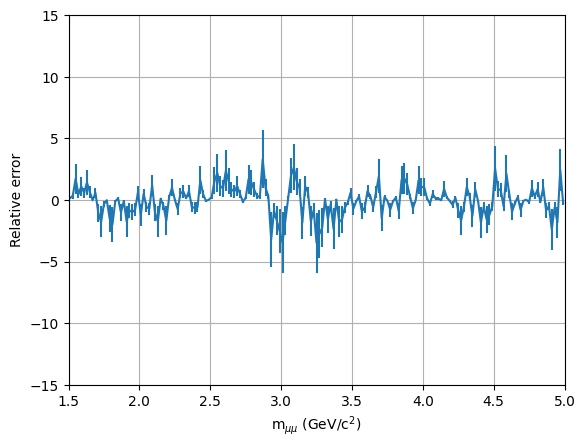

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
def dCB2(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )
    
    def dCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(-2*mu + 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: -AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def dCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: AL/(BL - (-mu + x)/sig)**nL, 
                             lambda x: np.exp(-(-mu + x)**2/(2*sig**2)), 
                             lambda x: AR/(BR + (-mu + x)/sig)**nR])

    def dCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL/(sig*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: -N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2), 
                             lambda x: AR*N*nR/(sig*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])

    def dCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
        return np.piecewise(x, 
                            [( x - mu )/sig < -1 * alphaL, 
                             (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , 
                             ( x - mu )/sig > alphaR],
                            [lambda x: -AL*N*nL*(-mu + x)/(sig**2*(BL - (-mu + x)/sig)*(BL - (-mu + x)/sig)**nL), 
                             lambda x: N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3, 
                             lambda x: AR*N*nR*(-mu + x)/(sig**2*(BR + (-mu + x)/sig)*(BR + (-mu + x)/sig)**nR)])
    
    def IdCB2dx(x, *args):
        return quad(dCB2dx, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dN(x, *args):
        return quad(dCB2dN, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dmu(x, *args):
        return quad(dCB2dmu, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    def IdCB2dsig(x, *args):
        return quad(dCB2dsig, start, stop, args = args, limit = len(x))[0] / ((stop - start)/bins)
    
    return np.sqrt(IdCB2dx(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * (((stop - start)/bins)/2)**2 \
                   + IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0, 0] \
                   + IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1, 1] \
                   + IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2, 2] \
                   + 2 * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[0, 1])) \
                   + 2 * IdCB2dmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[1, 2])) \
                   + 2 * IdCB2dsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * IdCB2dN(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(np.abs(pcov[2, 1])))

N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = dCB2(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi, "(stat.)")

N_JPsi =  38053.791369474275  +/-  652.8466915935252 (stat.)
